<h3>Name : Hossein Yahayaei </h3>
<h3>U-ID : 99222119</h3>
<h3>Course : Digital Image Processing </h3>

In [1]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [83]:
image1 = cv.imread("image1.jpg")

### This is how CascadeClassiffier works to detect faces (The method in opencv):
<p>Haar features extraction: The first step is to extract Haar-like features from the input image. These features are similar to edge and texture features but are defined as the difference between the sum of pixel intensities in adjacent rectangular regions.Adaboost training: The next step is to train an Adaboost classifier on the extracted features. Adaboost is a machine learning algorithm that combines multiple weak classifiers to form a strong classifier. During training it selects the best features to differentiate between positive and negative samples.Cascade classifier: The final step is to use the trained Adaboost classifier to detect faces in the input image. The cascade classifier is a collection of stages where each stage consists of multiple weak classifiers. The stages are ordered in such a way that they progressively filter out non-faces while retaining true faces. During detection the input image is first resized to different scales and the cascade classifier is applied to each scale. At each scale the image is passed through each stage of the cascade classifier and if a stage fails the image is immediately rejected. If an image passes all the stages it is classified as a face.</p>
In better way we can say:
<p>the input image is resized to different scales and the cascade classifier is applied to each scale. This is because faces can appear at different sizes and orientations in an image, so it's important to search for them at multiple scales.At each scale, the image is passed through each stage of the cascade classifier. Each stage consists of multiple weak classifiers, which are trained to identify specific features of faces. For example one weak classifier might look for the presence of eyes, while another might look for the presence of a nose. Each weak classifier produces a score indicating the likelihood that the input image contains a face based on the specific feature it's looking for.If an image fails any stage of the cascade classifier, it is immediately rejected as a non-face. This is possible because the cascade classifier is designed in such a way that the stages are ordered in increasing complexity, with each stage filtering out non-faces while retaining as many true faces as possible.If an image passes all the stages of the cascade classifier, it is classified as a face. </p>

In this section i used opencv CascaedClassifier method to use haarcascade face detectore approach to detect each of those faces and after that i used opencv rectangle method to draw a rectangle around each of these detected face to clearify the detection

In [84]:
cascade_module = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
all_faces = cascade_module.detectMultiScale(image1,scaleFactor=1.2, minNeighbors=7)
image = image1.copy()
for x,y,w,h in all_faces:
    cv.rectangle(image, (x,y), (x+w,y+h), (120,223,0),5)
    # print(x+w,y+h,w,h)
    # break
    
len(all_faces)

6

In this part image has been resized to visualize better

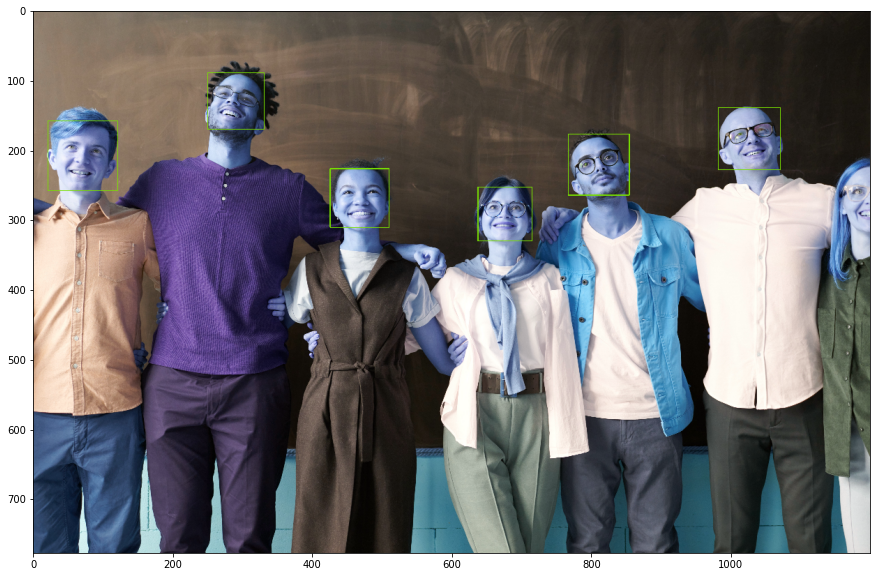

In [85]:
image = cv.resize(image, (0,0),fx=0.2,fy=0.2)
plt.figure(figsize=(15,15))
plt.imshow(image)
# cv.imshow("detected faces", image) 
# cv.waitKey(0)
# cv.destroyAllWindows()

As we can see in below two function has been created to flip the faces in the image based on X and Y axis i used column/row wise replacement to do this geometric transformation on the image 

In [88]:
def flip_img_y(img, all_faces):
    new_image = img.copy()
    for x,y,w,h in all_faces:
        face = np.zeros((h,w,3))
    
        for i in range(w):
            face[:,-i] = new_image[y:y+h,x+i]

        for i in range(w):
            new_image[y:y+h,x+i] = face[:, i]

    return new_image

def flip_img_x(img, all_faces):
    new_image = img.copy()
    for x,y,w,h in all_faces:
        face = np.zeros((h,w,3))
    
        for i in range(h):
            face[-i, :] = new_image[y+i,x:x+w]

        for i in range(h):
            new_image[y+i,x:x+w] = face[i,:]

    return new_image

In [89]:
fliped_by_y = flip_img_y(image1, all_faces)

As plot shows faces are fliped based on Y axis 

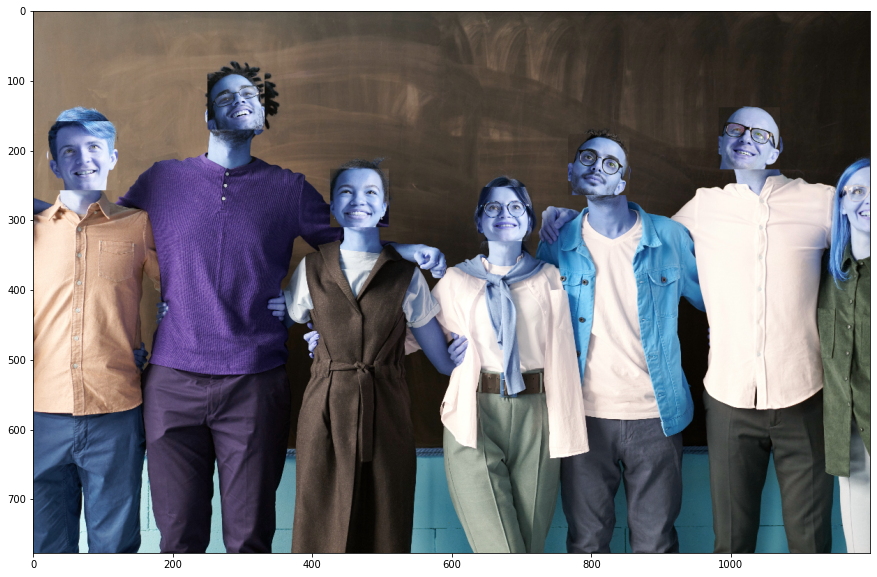

In [93]:
fliped_image_y = cv.resize(fliped_by_y, (0,0),fx=0.2,fy=0.2)
plt.figure(figsize=(15,15))
plt.imshow(fliped_image_y)
# cv.imshow("Fliped image on Y axis", fliped_image_y)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [94]:
fliped_by_x = flip_img_x(image1, all_faces)

Same as here faces are fliped based on X axis

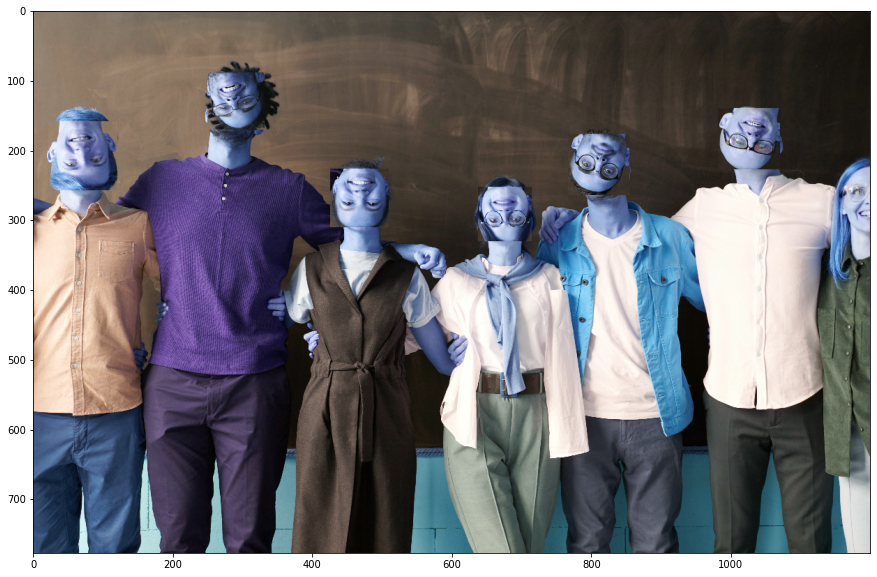

In [95]:
fliped_by_x = cv.resize(fliped_by_x, (0,0),fx=0.2,fy=0.2)
plt.figure(figsize=(15,15))
plt.imshow(fliped_by_x)
# cv.imshow("Fliped image on X axis", fliped_by_x)
# cv.waitKey(0)
# cv.destroyAllWindows()

In this part i tried to implement mirroring function by just mirror the image from half 

In [96]:
def mirror_img_y(img, all_faces):
    new_image = img.copy()
    for x,y,w,h in all_faces:
        face = np.zeros((h,w,3))
    
        for i in range(int(w/2)):
            face[:,-i] = new_image[y:y+h,x+i]
            face[:,i] = new_image[y:y+h,x+i]

        for i in range(w):
            new_image[y:y+h,x+i] = face[:, i]

    return new_image


In [97]:
mirrored_y = mirror_img_y(image1, all_faces)

Just ploted the result 

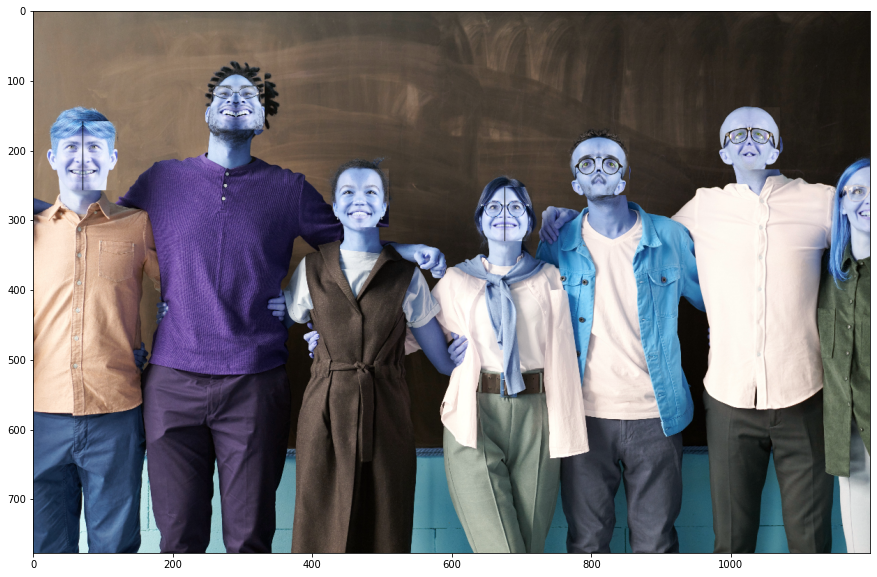

In [98]:
mirrored_y = cv.resize(mirrored_y, (0,0),fx=0.2,fy=0.2)
plt.figure(figsize=(15,15))
plt.imshow(mirrored_y)
# cv.imshow("Mirrored iamge on y axis", mirrored_y)
# cv.waitKey(0)
# cv.destroyAllWindows()

In this part i will shift the image to the right by specified number of pixels 

In [99]:
def shift(img, all_faces, shift_num):
    new_image = img.copy()
    for x,y,w,h in all_faces:
        face = np.zeros((h,w,3))
        for i in range(w-shift_num):
            face[:,i+shift_num] = new_image[y:y+h,x+i]

        for i in range(w):
            new_image[y:y+h,x+i] = face[:, i]

    return new_image


In [100]:
shifted_image = shift(image1, all_faces, 95)

There we can see the result of this shifting function 

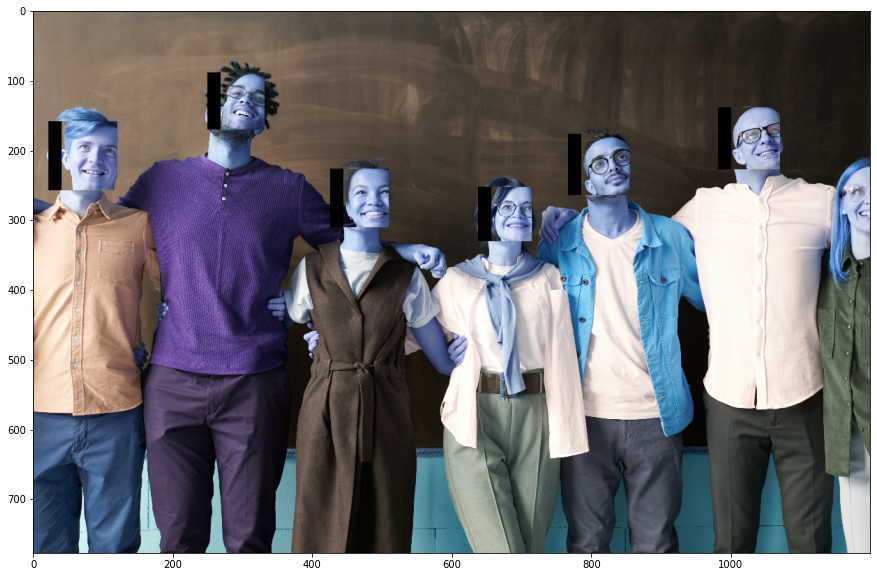

In [101]:
shifted_image = cv.resize(shifted_image, (0,0),fx=0.2,fy=0.2)
plt.figure(figsize=(15,15))
plt.imshow(shifted_image)
# cv.imshow("Shifted image to the right", shifted_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

## Question 2

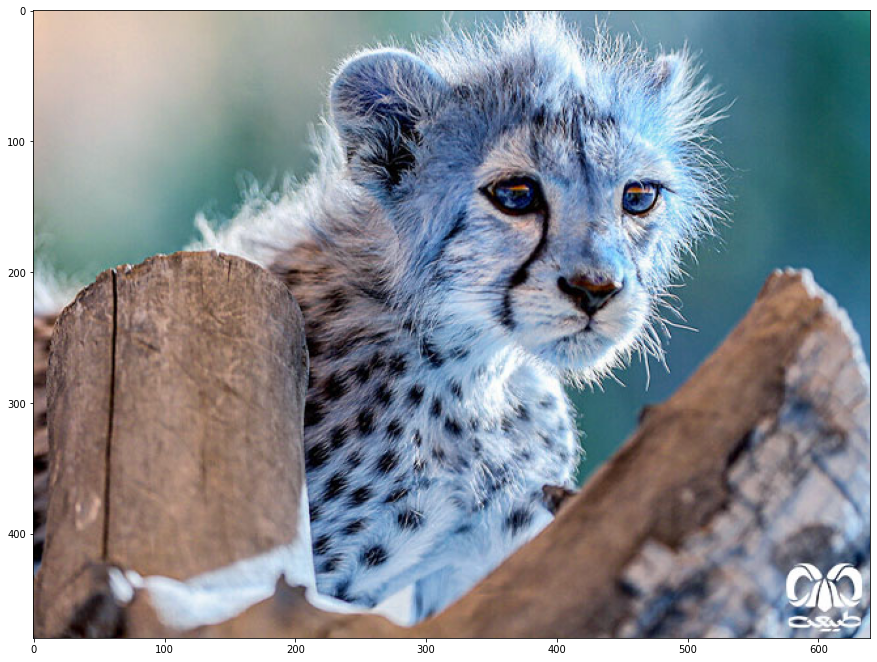

In [102]:
image2 = cv.imread("image2.jpg")
plt.figure(figsize=(15,15))
plt.imshow(image2)

In this function i got two inputs that are original image and the number of colors i want to use to compress the image -> first  reshaped the image to two dimensional matrix and then used kmeans clustering to quantize colors -> after that by using centroid of these cluster as lookup table of colors i predicted the values of these colors for every pixel value in the original picture and then returned the LUT and pixel color index which centroid coordinate

In [105]:
def compress_by_idx(image, num_colors):
    pixels = image.reshape((-1,3))
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    lookup_table = kmeans.cluster_centers_
    new_image = kmeans.predict(pixels)
    new_image = new_image.reshape(image.shape[0], image.shape[1])
    return new_image, lookup_table

In this function as quastion wants it has two inputs lookup table and image matrix -> by recreating the image from lookup table and image matrix i ploted the new image again 

In [111]:
def plot_compressed(lookup_table, image):
    d1,d2= image.shape
    new_image = np.zeros((d1, d2, 3), dtype=np.uint8)
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            new_color_v = lookup_table[image[i,j]]
            new_image[i,j] = new_color_v
        
    plt.figure(figsize=(12,12))
    plt.imshow(new_image)
    # cv.imshow("Image", new_image)
    # cv.waitKey(0)
    # cv.destroyAllWindows()

So as we can see quality of the image with same number of cluster or group of colors in RGB color space is way better than other clusters,My coclusion so far is as we seperate saturation and brightness of an image indexed image is not suitable approach to compress the image .Thus its better to use RGB color space to have better understanding of imagae.

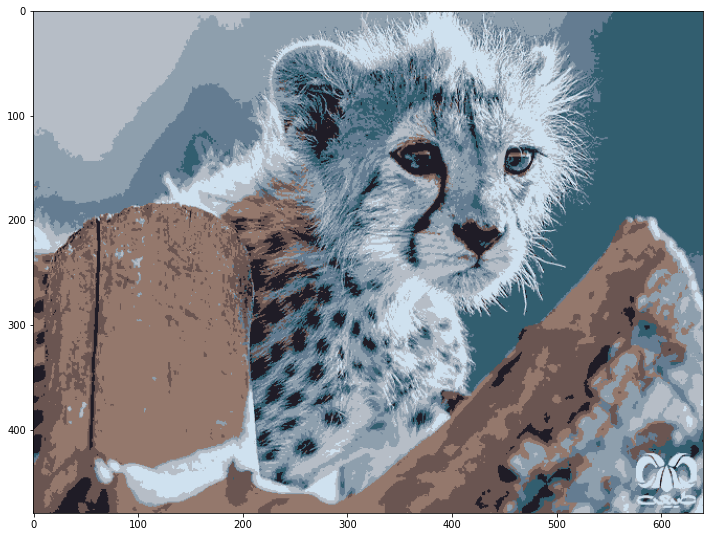

In [112]:
image_matrix, lookup_table = compress_by_idx(image2, 8)
plot_compressed(lookup_table, image_matrix)

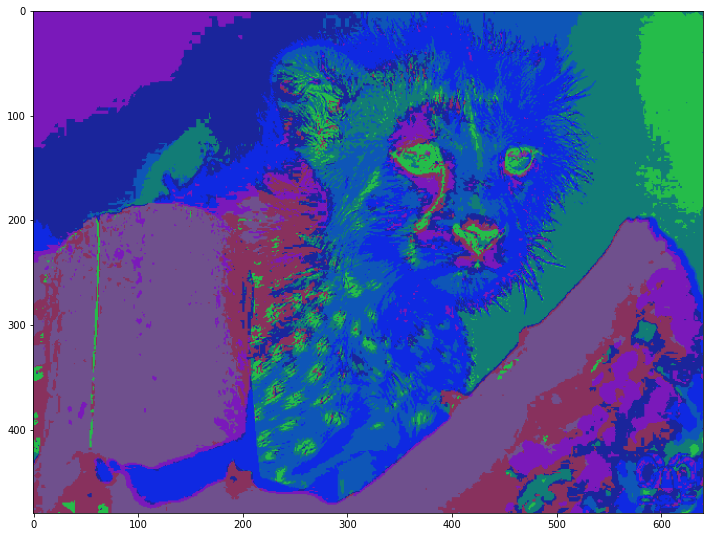

In [113]:
hsv_image = cv.cvtColor(image2, cv.COLOR_BGR2HSV)
image_matrix, lookup_table = compress_by_idx(hsv_image, 8)
plot_compressed(lookup_table, image_matrix)

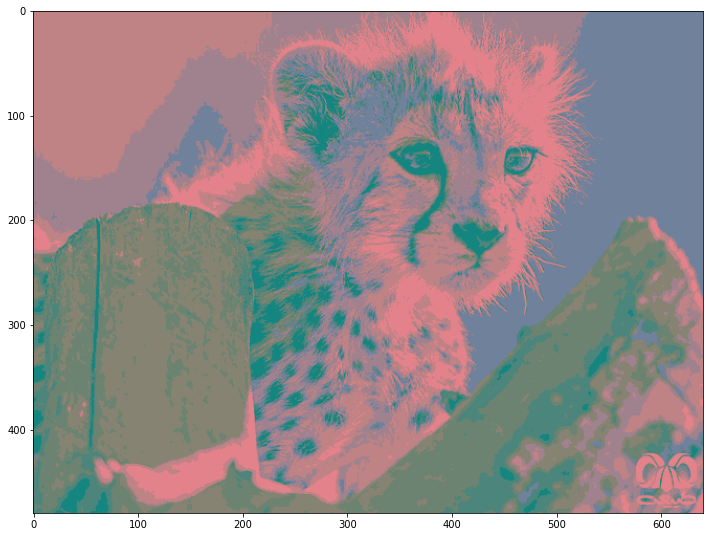

In [114]:
lab_image = cv.cvtColor(image2, cv.COLOR_BGR2LAB)
image_matrix, lookup_table = compress_by_idx(lab_image, 8)
plot_compressed(lookup_table, image_matrix)

LAB and YCRCB color space have almost the same answers and its quite reasonable because both of these color spaces are seprating brightness from color diminsions in l*a*b* a and b dimentions are related to color so the same as ycbcr color space which cb and cr are color dimensions . 
<p>In general ycbcr and l*a*b* did better than HSV color space in case of having smaller number of colors</p>

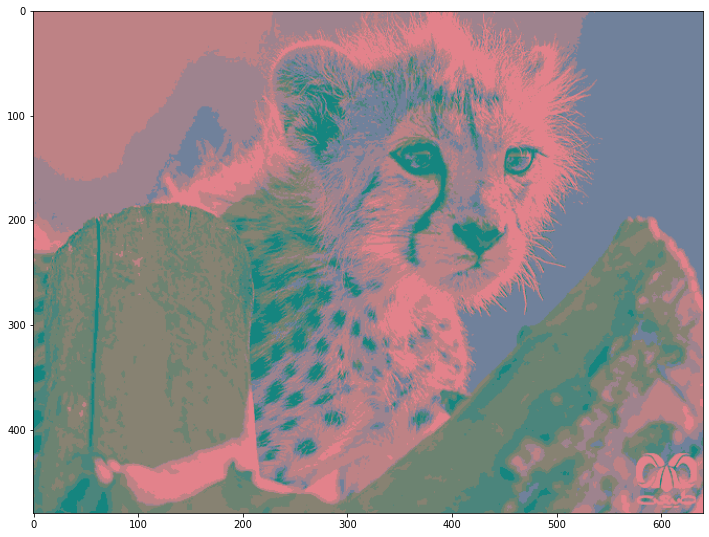

In [115]:
ycrcb_image = cv.cvtColor(image2, cv.COLOR_BGR2LAB)
image_matrix, lookup_table = compress_by_idx(ycrcb_image, 8)
plot_compressed(lookup_table, image_matrix)